In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='darkgrid')

In [3]:
df = pd.read_csv('sbikedata.csv')

In [4]:
df2 = df.copy()

## 이변량 분석

* 일별 이변량 분석

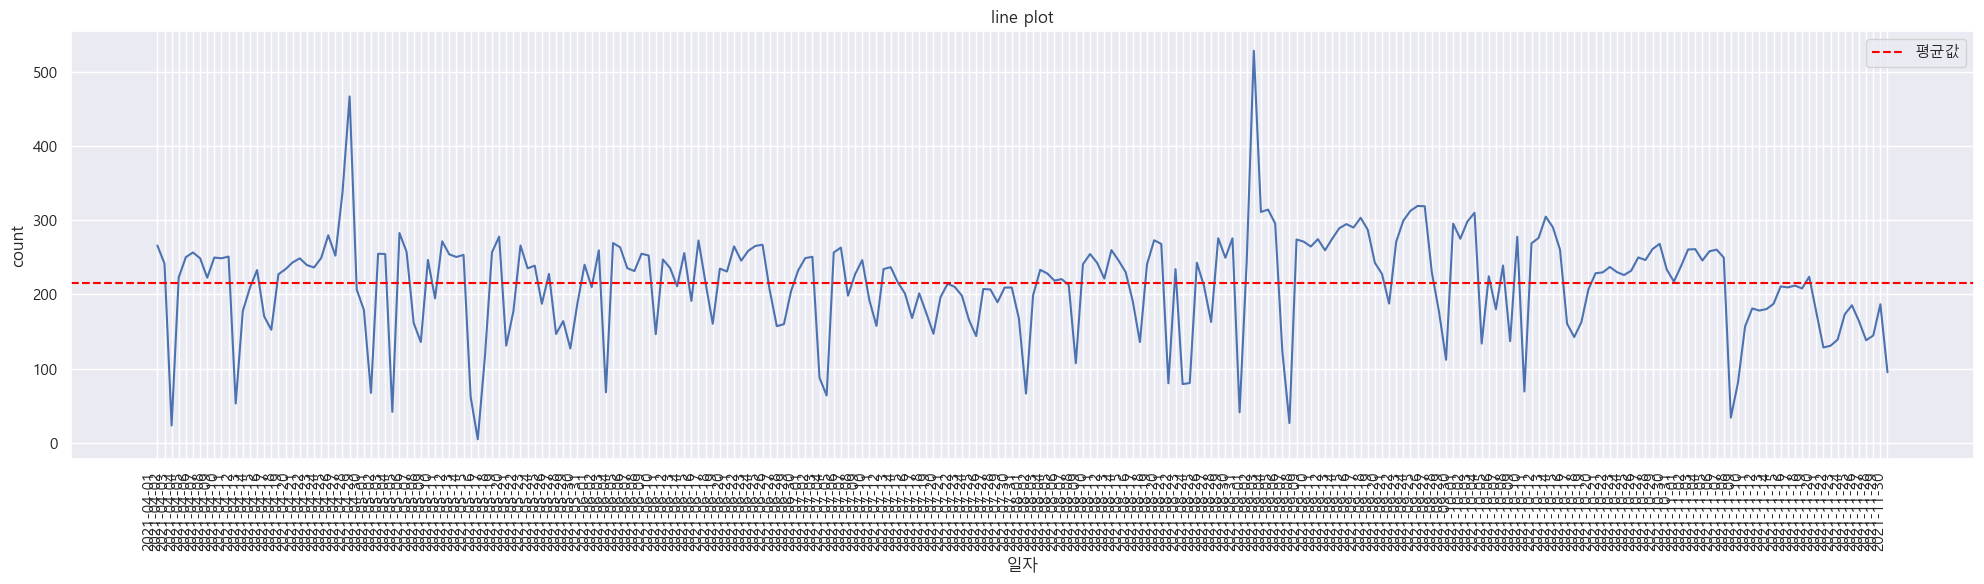

In [5]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df2.groupby('date')['count'].mean())
plt.title('line plot')
plt.axhline(df2['count'].mean(), color='red', linestyle='--', label='평균값')
plt.xticks(rotation=90, ha='right')
plt.xlabel('일자')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

* 월별 이변량 분석

In [6]:
df2['date'] = pd.to_datetime(df2['date'])

In [7]:
# 'date' 컬럼을 년, 월, 일로 분리하여 새로운 열로 추가
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['day'] = df2['date'].dt.day
df2['season'] = np.where(df2['month'] < 5, '봄', np.where(df2['month'] < 8, '여름', np.where(df2['month'] < 11, '가을', '겨울')))

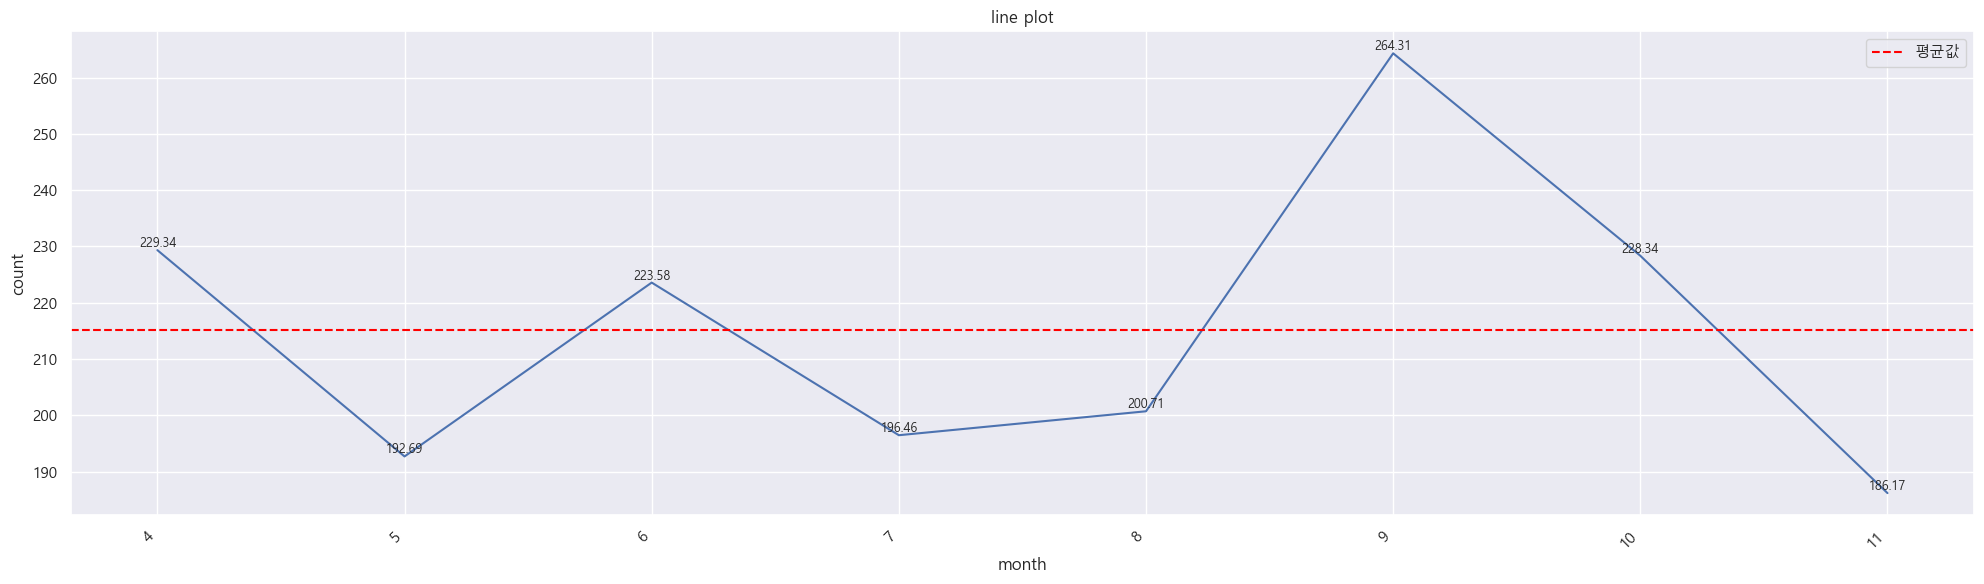

In [8]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df2.groupby('month')['count'].mean())
plt.title('line plot')
plt.axhline(df2['count'].mean(), color='red', linestyle='--', label='평균값')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
for index, value in df2.groupby('month')['count'].mean().items():
    plt.text(index, value, "{:.2f}".format(value), fontsize=9, ha='center', va='bottom')
plt.show()

* 계절별 이변량 분석

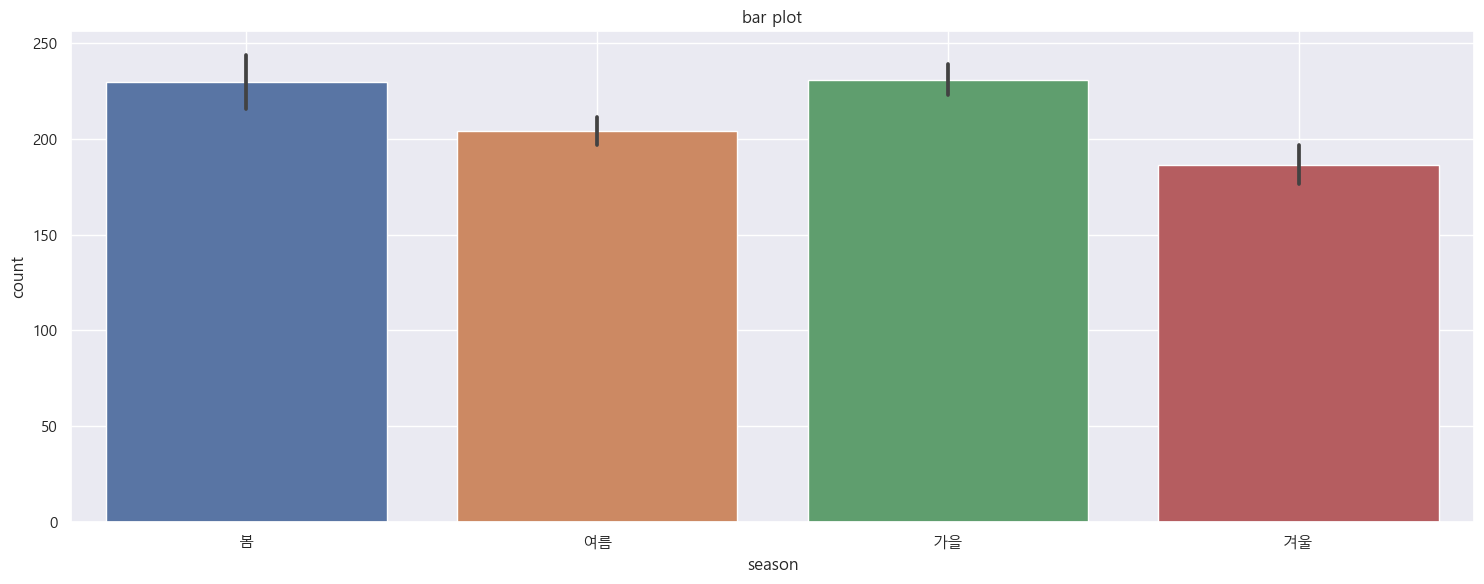

In [9]:
target = 'count'
feature = 'season'
plt.figure(figsize=(15, 6))

sns.barplot(x=feature, y=target, data=df2)
plt.title('bar plot')
plt.xlabel(feature)
plt.ylabel(target)
plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
P_1 = df2.loc[df2.season == '봄', target]
P_2 = df2.loc[df2.season == '여름', target]
P_3 = df2.loc[df2.season == '가을', target]
P_4 = df2.loc[df2.season == '겨울', target]

spst.f_oneway(P_1, P_2, P_3, P_4)

F_onewayResult(statistic=14.926611011776354, pvalue=1.1185216845991439e-09)